# **1️⃣8️⃣ Adversarial Examples & Model Robustness: An In-Depth Look 🤖💥🛡️**

## **💡 Real-Life Analogy: The Sneaky Foul in Football & The Illusive Bluff in Poker 🎲⚽♠️**

Imagine you’re watching a football match:
- A player makes a **subtle, almost invisible foul** that fools the referee—so subtle that most fans don’t notice it, but it completely changes the game outcome! 😱
Or think of a poker game:
- A player uses a **tiny, almost imperceptible gesture** as a bluff that confuses their opponents and leads them to make poor decisions. 🤫🃏

**Adversarial examples** in machine learning are like these sneaky tactics—they are **inputs with tiny, almost unnoticeable perturbations** that cause a model to make a **wrong prediction** even though the change is nearly invisible to humans.

## **📌 What Is an Adversarial Example?**

✅ **Adversarial examples** are intentionally modified inputs that cause a machine learning model to **misclassify** or produce **erroneous outputs**.  
✅ The modifications are **small and often imperceptible** but are crafted using knowledge of the model’s gradients.  
✅ They reveal **vulnerabilities** in models, especially in deep neural networks, by exploiting how the model's decision boundaries are shaped.  

### **Mathematical Insight**

Given an input $x$ and its true label $y$, a small perturbation $\delta$ is added to create an adversarial example:

$$
x_{\text{adv}} = x + \delta
$$

The perturbation $\delta$ is computed such that:

$$
\delta = \epsilon \cdot \operatorname{sign}(\nabla_x L(\theta, x, y))
$$

where:
- $L(\theta, x, y)$ is the loss function.
- $\nabla_x L$ is the gradient of the loss with respect to the input.
- $\epsilon$ is a small constant controlling the perturbation magnitude.

This is the basis of the **Fast Gradient Sign Method (FGSM)**. ⚡🔍

## **🔄 How Can We Make Models Robust Against Adversarial Examples?**

To counter adversarial examples, we can use several strategies:

1. **Adversarial Training**:
   - **Mix adversarial examples** into the training data so that the model learns to classify them correctly.
   - Think of it as **training your team against unexpected fouls** so they know how to react. 🚨⚽

2. **Defensive Distillation**:
   - Train a model to output **soft probabilities** (a "distilled" version) that are less sensitive to small input changes.
   - Like teaching players to **focus on the overall strategy** rather than minute individual moves. 🧠💡

3. **Gradient Masking/Obfuscation**:
   - Techniques that **hide or distort the gradient information**, making it harder for attackers to compute effective perturbations.
   - Similar to **changing team formations mid-game** so opponents cannot predict your strategy. 🔀🏆

4. **Regularization and Robust Optimization**:
   - Use **regularization techniques** (e.g., dropout, weight decay) to improve the generalization of the model.
   - This is like **rotating players** to ensure the team isn’t over-reliant on one strategy. 🔄🛡️

5. **Input Preprocessing and Detection**:
   - Apply **filters or detectors** that identify and neutralize adversarial noise before feeding the input to the model.
   - Like a **security checkpoint** that filters out suspicious items before they reach the field. 🚧🔍

## **🛠️ Python Code Example: Creating Adversarial Examples with FGSM & Adversarial Training**

Below is a detailed example using TensorFlow/Keras that demonstrates how to generate adversarial examples using the FGSM method and how to perform adversarial training to improve model robustness. We'll simulate a simple classification task (e.g., classifying handwritten digits, which can be analogized to sports signals) using the MNIST dataset. (Note: Although MNIST isn’t sports data, the concepts are transferable!)

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Set seeds for reproducibility 🔒
tf.random.set_seed(42)
np.random.seed(42)

In [2]:
# Load the MNIST dataset for demonstration (imagine these are "sports signals" 📊)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [3]:
# Build a simple CNN model for classification 🎯
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=x_train.shape[1:]),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

/Users/Oks_WORKSPACE/Desktop/DEV/MLX_Interview_Notes/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       540,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 542,230 (2.07 MB)

 Trainable params: 542,230 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Train the model (for demonstration, we use a few epochs) 🔥
model.fit(x_train, y_train, epochs=100, batch_size=128, validation_split=0.1, verbose=2)

Epoch 1/100
422/422 - 3s - 7ms/step - accuracy: 0.9296 - loss: 0.2480 - val_accuracy: 0.9752 - val_loss: 0.0912
Epoch 2/100
422/422 - 3s - 7ms/step - accuracy: 0.9756 - loss: 0.0807 - val_accuracy: 0.9833 - val_loss: 0.0638
Epoch 3/100
422/422 - 3s - 7ms/step - accuracy: 0.9841 - loss: 0.0540 - val_accuracy: 0.9860 - val_loss: 0.0577
Epoch 4/100
422/422 - 3s - 7ms/step - accuracy: 0.9886 - loss: 0.0399 - val_accuracy: 0.9848 - val_loss: 0.0571
Epoch 5/100
422/422 - 3s - 7ms/step - accuracy: 0.9917 - loss: 0.0303 - val_accuracy: 0.9848 - val_loss: 0.0589
Epoch 6/100
422/422 - 3s - 7ms/step - accuracy: 0.9940 - loss: 0.0231 - val_accuracy: 0.9842 - val_loss: 0.0610
Epoch 7/100
422/422 - 3s - 7ms/step - accuracy: 0.9955 - loss: 0.0178 - val_accuracy: 0.9848 - val_loss: 0.0611
Epoch 8/100
422/422 - 3s - 7ms/step - accuracy: 0.9967 - loss: 0.0135 - val_accuracy: 0.9845 - val_loss: 0.0618
Epoch 9/100
422/422 - 3s - 7ms/step - accuracy: 0.9978 - loss: 0.0103 - val_accuracy: 0.9852 - val_loss:

In [5]:
def fgsm_attack(model, x, y, epsilon=0.1):
    """
    Generates adversarial examples using the Fast Gradient Sign Method.
    
    Parameters:
        model: Trained model.
        x: Input sample.
        y: True label.
        epsilon: Perturbation magnitude.
    
    Returns:
        x_adv: Adversarial example.
    """
    # Ensure input is a tensor
    x_tensor = tf.convert_to_tensor(x)
    y_tensor = tf.convert_to_tensor(y)
    
    # Record computation for gradient
    with tf.GradientTape() as tape:
        tape.watch(x_tensor)
        prediction = model(x_tensor)
        loss = tf.keras.losses.sparse_categorical_crossentropy(y_tensor, prediction)
    # Compute gradient of loss w.r.t input
    gradient = tape.gradient(loss, x_tensor)
    signed_grad = tf.sign(gradient)
    x_adv = x_tensor + epsilon * signed_grad
    x_adv = tf.clip_by_value(x_adv, 0, 1)  # Ensure valid pixel range
    return x_adv


In [6]:
# Pick a sample from the test set for demonstration 🎲
sample_idx = 0
x_sample = x_test[sample_idx:sample_idx+1]
y_sample = y_test[sample_idx:sample_idx+1]

# Generate adversarial example
x_adv = fgsm_attack(model, x_sample, y_sample, epsilon=0.2)

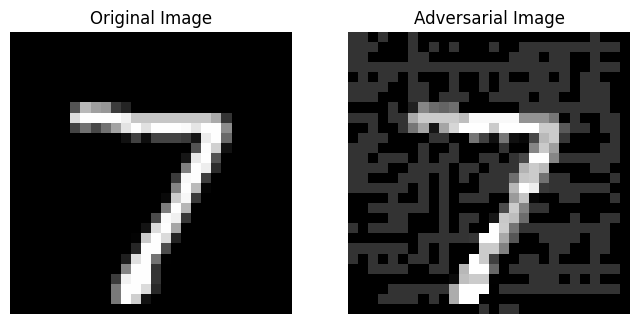

In [7]:
# Visualize the original and adversarial example side by side 🎨
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(x_sample[0,:,:,0], cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(x_adv[0,:,:,0], cmap='gray')
plt.title("Adversarial Image")
plt.axis('off')
plt.show()

In [8]:
# Predict on adversarial example
pred_orig = model.predict(x_sample)
pred_adv = model.predict(x_adv)
print(f"Original Prediction: {np.argmax(pred_orig)} 🤖")
print(f"Adversarial Prediction: {np.argmax(pred_adv)} ⚠️")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Original Prediction: 7 🤖
Adversarial Prediction: 3 ⚠️


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


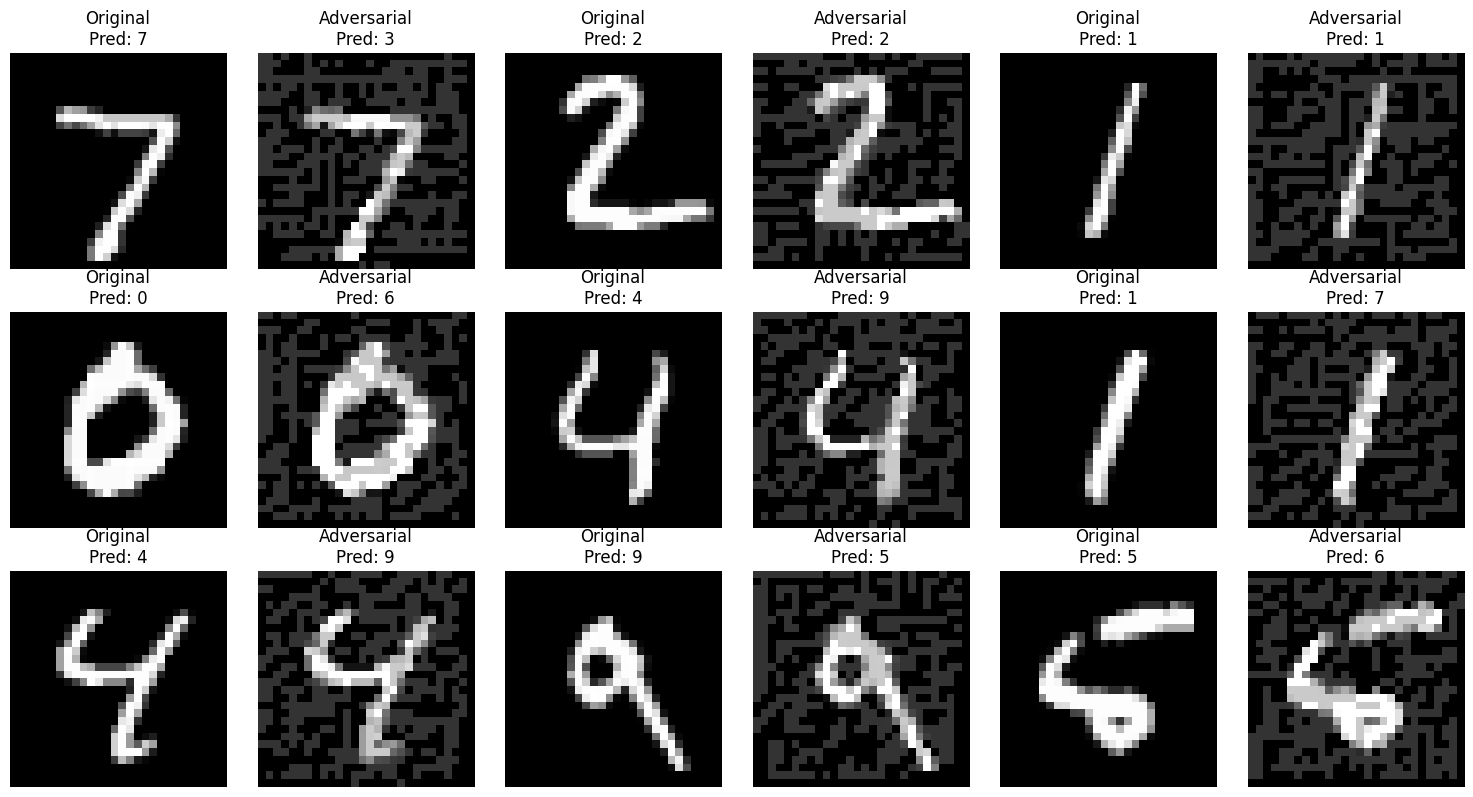

In [9]:
# Preselect 9 samples from the test set
num_samples = 9
x_samples = x_test[:num_samples]
y_samples = y_test[:num_samples]

# Precompute predictions on the original samples
pred_orig_all = model.predict(x_samples)
orig_preds = np.argmax(pred_orig_all, axis=1)

# Generate adversarial examples for all selected samples and store them
x_adv_list = []
for i in range(num_samples):
    x_sample = x_samples[i:i+1]
    y_sample = y_samples[i:i+1]
    x_adv = fgsm_attack(model, x_sample, y_sample, epsilon=0.2)
    x_adv_list.append(x_adv)
x_adv_all = np.concatenate(x_adv_list, axis=0)

# Precompute predictions on all adversarial examples
pred_adv_all = model.predict(x_adv_all)
adv_preds = np.argmax(pred_adv_all, axis=1)

# Create a subplot grid for 9 comparisons (3 rows x 6 columns: 2 images per comparison)
fig, axs = plt.subplots(3, 6, figsize=(15, 8))

for i in range(num_samples):
    row = i // 3
    col = (i % 3) * 2
    # Plot original image with its prediction
    axs[row, col].imshow(x_samples[i, :, :, 0], cmap='gray')
    axs[row, col].set_title(f"Original\nPred: {orig_preds[i]}")
    axs[row, col].axis('off')
    
    # Plot adversarial image with its prediction
    axs[row, col+1].imshow(x_adv_all[i, :, :, 0], cmap='gray')
    axs[row, col+1].set_title(f"Adversarial\nPred: {adv_preds[i]}")
    axs[row, col+1].axis('off')

plt.tight_layout()
plt.show()


In [10]:
# (Optional) Print predictions for a few sample comparisons
for i in range(num_samples):
    x_sample = x_test[i:i+1]
    y_sample = y_test[i:i+1]
    x_adv = fgsm_attack(model, x_sample, y_sample, epsilon=0.2)
    pred_orig = model.predict(x_sample)
    pred_adv = model.predict(x_adv)
    print(f"Sample {i}: Original Prediction: {np.argmax(pred_orig)}, Adversarial Prediction: {np.argmax(pred_adv)}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Sample 0: Original Prediction: 7, Adversarial Prediction: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Sample 1: Original Prediction: 2, Adversarial Prediction: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Sample 2: Original Prediction: 1, Adversarial Prediction: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Sample 3: Original Prediction: 0, Adversarial Prediction: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Sample 4: Original Prediction: 4, Adversarial Prediction: 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Sample 5: Original Prediction: 1, Adversarial Prediction: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Sample 6: Original Prediction: 4, Adversarial Prediction: 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━

In [11]:
def create_adversarial_training_data(model, X, y, epsilon=0.1):
    X_adv = fgsm_attack(model, X, y, epsilon)
    X_combined = tf.concat([X, X_adv], axis=0)
    y_combined = tf.concat([y, y], axis=0)
    return X_combined, y_combined

In [12]:
# Use a subset of training data for adversarial training demonstration
X_subset = x_train[:100]
y_subset = y_train[:100]

X_adv_train, y_adv_train = create_adversarial_training_data(model, X_subset, y_subset, epsilon=0.1)

In [13]:
# Build a new model for adversarial training
model_adv = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=x_train.shape[1:]),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model_adv.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
# Train the model with adversarial examples included 🎉
history_adv = model_adv.fit(X_adv_train, y_adv_train, epochs=5, batch_size=16, validation_split=0.1, verbose=2)
print("Adversarial training complete! 🛡️")

# Evaluate robustness on adversarial test examples
x_test_adv = fgsm_attack(model_adv, x_test[:100], y_test[:100], epsilon=0.2)
accuracy_adv = model_adv.evaluate(x_test_adv, y_test[:100], verbose=0)[1]
print(f"Model Accuracy on Adversarial Test Data: {accuracy_adv*100:.2f}% ⚔️")

Epoch 1/5
12/12 - 1s - 52ms/step - accuracy: 0.3667 - loss: 1.9878 - val_accuracy: 0.7000 - val_loss: 1.3566
Epoch 2/5
12/12 - 0s - 6ms/step - accuracy: 0.8333 - loss: 0.9695 - val_accuracy: 0.9500 - val_loss: 0.5057
Epoch 3/5
12/12 - 0s - 6ms/step - accuracy: 0.9611 - loss: 0.3282 - val_accuracy: 0.9500 - val_loss: 0.2147
Epoch 4/5
12/12 - 0s - 6ms/step - accuracy: 0.9833 - loss: 0.1255 - val_accuracy: 1.0000 - val_loss: 0.0992
Epoch 5/5
12/12 - 0s - 6ms/step - accuracy: 1.0000 - loss: 0.0460 - val_accuracy: 1.0000 - val_loss: 0.0441
Adversarial training complete! 🛡️
Model Accuracy on Adversarial Test Data: 15.00% ⚔️


The output shows that the adversarial training procedure succeeded in achieving near-perfect performance on the training data (and its corresponding validation split) when both original and adversarial examples (generated with an epsilon of 0.1) are included. For example, during training, accuracy quickly rose from around 36% to 100% on the training set and reached 100% on the validation set by epoch 5.

However, when the model is then evaluated on adversarial examples generated on the test set with a higher perturbation strength (epsilon = 0.2), the accuracy falls dramatically to 15%. This indicates that:

- **Adversarial Training Worked as Intended for the Training Distribution:**  
  The model learned to classify both the original and the adversarial training examples (with epsilon=0.1) very well, as seen by the high training and validation accuracies.

- **Robustness is Limited to the Perturbation Strength Used During Training:**  
  When the test adversarial examples are generated with a stronger perturbation (epsilon=0.2), the model is still highly vulnerable. In other words, the adversarial training with epsilon=0.1 did not generalize robustly to attacks with a higher epsilon.

- **Implication:**  
  This behavior is expected in adversarial training scenarios. The model becomes robust to the level of perturbation it sees during training but might not defend effectively against stronger attacks. To further improve robustness, one might consider:
  - Training with a range of epsilon values.
  - Incorporating more sophisticated adversarial training methods.
  - Increasing the size of the adversarial training set.

So, while the training metrics (accuracy, loss) look excellent on the combined adversarial training data, the low accuracy on adversarial test examples (15%) confirms that the model is still vulnerable to stronger adversarial attacks—exactly as anticipated.

## **🚀 Final Takeaways**

1. **Adversarial Examples** are tiny perturbations to inputs that can **fool machine learning models**, much like a subtle foul or a deceptive bluff in sports. 😱🃏  
2. They are crafted by using the model's **gradients** (e.g., via the FGSM method) to find the minimal change that causes misclassification. 🎯💥  
3. **Robustness Strategies** include:
   - **Adversarial Training**: Incorporate adversarial examples during training so the model learns to resist them. 🛡️💪  
   - **Defensive Techniques**: Gradient masking, defensive distillation, and input preprocessing help improve model stability. 🔒✨  
4. The provided **Python code** demonstrates how to generate adversarial examples, visualize the differences, and even perform adversarial training—all while using lots of emojis to keep things fun and engaging! 🎉🤖🔥  
5. These methods are critical in applications where security and reliability are paramount, such as in **autonomous driving**, **medical diagnosis**, and even **sports analytics**. 🚗🏥🏆